In [13]:
print("hello world")

hello world


In [14]:
# basics
import pandas as pd 
import numpy as np
import os 
import re
from datetime import datetime
from tqdm.notebook import tqdm
tqdm.pandas()
import requests
import urllib

# plotting
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import plotly.express as px
import seaborn as sns

# modeling
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
# local or gdrive
path_source = 'local2'

if path_source == 'gdrive':
  from google.colab import drive
  drive.mount('/content/gdrive')
  data_path = '/content/gdrive/MyDrive/Classes/W210_capstone/W210_Capstone/Data/joined_data'
  #env_path = '/content/gdrive/MyDrive/.env'
  
elif path_source == 'local':
  data_path = '/Users/tj/trevorj@berkeley.edu - Google Drive/My Drive/Classes/W210_capstone/W210_Capstone/Data/joined_data'
  #env_path = '/content/gdrive/MyDrive/.env'

elif path_source == 'local2':
  data_path = '/data/modeling_data'
  #env_path = '/content/gdrive/MyDrive/.env'

In [4]:
  
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
   
current_path()
   
os.chdir('../')
   
current_path()

Current working directory before
c:\Users\anandadmin\Documents\ML_MS\UCB\2022_Fall\W210\JLPS_capstone_project\modeling

Current working directory before
c:\Users\anandadmin\Documents\ML_MS\UCB\2022_Fall\W210\JLPS_capstone_project



In [5]:
os.getcwd()

'c:\\Users\\anandadmin\\Documents\\ML_MS\\UCB\\2022_Fall\\W210\\JLPS_capstone_project'

In [6]:
# load full dataset
df = pd.read_csv('data\modeling_data\modeling_data_2022-10-16.csv')

In [7]:
df.head()

,year_month,school_zip,school_county_v2,school_region_name,pm25,school_elevation_m,ps_elevation_m,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,total_pop_under19,pop_under19_male,pop_under19_female,total_population,total_population_male,total_population_female,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wspd_merge,school_wdir_wrt_0n,ps_wdir_wrt_0n,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,nearby_point_source_count,school_wspd,ca_agi_per_returns,total_tax_liability,tax_liability_per_capita,school_temperature,ps_temperature,school_count,pm25_last_month,pm25_r6,pm25_r9,pm25_r12,pm25_r24,pm25_slope6,pm25_slope9,pm25_slope12,pm25_slope24,pm25_lag_12mo,year,month,school_region_name_central_coast,school_region_name_inland_empire,school_region_name_los_angeles_county,school_region_name_north_coast,school_region_name_northern_san_joaquin_valley,school_region_name_orange_county,school_region_name_san_diego_-_imperial,school_region_name_san_francisco_bay_area,school_region_name_southern_san_joaquin_valley,school_region_name_superior_california,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,2000-01-01,90001,Los Angeles,Los Angeles County,32.149998,44.728889,43.703333,6196.0,3209.0,2987.0,6672.0,3397.0,3275.0,5562.0,2850.0,2712.0,5075.0,2599.0,2476.0,23505.0,12055.0,11450.0,54481.0,27320.0,27161.0,14.241154,3854.812685,-90.196586,0.757031,-172.758321,-172.758321,82.561735,82.561735,0.757031,82.561735,1.124995,0.000000,0.757031,20049.704556,2608176.0,47.873130,14.277778,14.266667,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2000-01-01,90002,Los Angeles,Los Angeles County,31.849998,33.858889,29.690000,4795.0,2447.0,2348.0,5655.0,2870.0,2785.0,5077.0,2566.0,2511.0,4316.0,2179.0,2137.0,19843.0,10062.0,9781.0,44584.0,21553.0,23031.0,6.649500,2734.278190,-75.730039,0.757031,-172.758321,-172.758321,97.028283,97.028283,0.757031,97.028283,0.879819,0.222222,0.757031,19697.001063,1549733.0,34.759847,14.300000,14.400000,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2000-01-01,90003,Los Angeles,Los Angeles County,31.724998,42.329167,45.785000,6527.0,3297.0,3230.0,6894.0,3539.0,3355.0,5994.0,3000.0,2994.0,5381.0,2727.0,2654.0,24796.0,12563.0,12233.0,58187.0,28557.0,29630.0,11.672797,5281.522927,-63.495073,0.855611,-172.758321,-60.057878,106.478652,100.850655,0.806321,103.664653,0.869845,0.000000,0.757031,18895.491452,2255523.0,38.763349,14.300000,14.383333,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2000-01-01,90004,Los Angeles,Los Angeles County,29.560000,83.190000,102.906667,5621.0,2879.0,2742.0,5505.0,2816.0,2689.0,4470.0,2297.0,2173.0,4204.0,2199.0,2005.0,19800.0,10191.0,9609.0,67850.0,34200.0,33650.0,5.158316,6452.615217,-87.100171,0.757031,-172.758321,-172.758321,78.897449,78.897449,0.757031,78.897449,1.160977,0.000000,0.757031,41990.032278,44046571.0,649.175696,14.022222,13.911111,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2000-01-01,90006,Los Angeles,Los Angeles County,30.750000,65.920000,77.570000,5939.0,3050.0,2889.0,6009.0,2995.0,3014.0,4493.0,2337.0,2156.0,4416.0,2370.0,2046.0,20857.0,10752.0,10105.0,62765.0,31901.0,30864.0,3.553121,5187.184865,-78.360123,0.757031,-172.758321,-172.758321,94.398199,94.398199,0.757031,94.398199,0.923498,0.000000,0.757031,17629.297337,3132557.0,49.909297,14.140000,14.100000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df.columns

Index(['year_month', 'school_zip', 'school_county_v2', 'school_region_name',
       'pm25', 'school_elevation_m', 'ps_elevation_m', 'population_0_4',
       'population_0_4_male', 'population_0_4_female', 'population_5_9',
       'population_5_9_male', 'population_5_9_female', 'population_10_14',
       'population_10_14_male', 'population_10_14_female', 'population_15_19',
       'population_15_19_male', 'population_15_19_female', 'total_pop_under19',
       'pop_under19_male', 'pop_under19_female', 'total_population',
       'total_population_male', 'total_population_female',
       'point_source_pm25_tpy', 'dist_school_to_ps_m', 'angle_to_school',
       'ps_wspd_merge', 'school_wdir_wrt_0n', 'ps_wdir_wrt_0n',
       'school_wind_alignment', 'ps_wind_alignment', 'avg_wind_speed',
       'avg_wind_alignment', 'avg_wind_alignment_cosine',
       'nearby_point_source_count', 'school_wspd', 'ca_agi_per_returns',
       'total_tax_liability', 'tax_liability_per_capita', 'school_temperatu

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312345 entries, 0 to 312344
Data columns (total 78 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   year_month                                      312345 non-null  object 
 1   school_zip                                      312345 non-null  int64  
 2   school_county_v2                                312345 non-null  object 
 3   school_region_name                              312345 non-null  object 
 4   pm25                                            312345 non-null  float64
 5   school_elevation_m                              312345 non-null  float64
 6   ps_elevation_m                                  312345 non-null  float64
 7   population_0_4                                  312345 non-null  float64
 8   population_0_4_male                             312345 non-null  float64
 9   population_0_4_female     

In [10]:
temp = df.isna().sum()

In [16]:
display(temp.sort_values(ascending=False))

pm25_r24                                          33312
pm25_slope24                                      33312
pm25_lag_12mo                                     16656
pm25_slope12                                      16656
pm25_r12                                          16656
pm25_r9                                           12492
pm25_slope9                                       12492
pm25_slope6                                        8328
pm25_r6                                            8328
pm25_last_month                                    1388
tax_liability_per_capita                             24
school_region_name_los_angeles_county                 0
school_count                                          0
ps_temperature                                        0
school_temperature                                    0
year                                                  0
month                                                 0
school_region_name_central_coast                

# Data Clean

In [17]:
# Make treatment var normally distributed by taking log(1+x)
df['pm25_log'] = np.log1p(df['pm25'])

In [18]:
# add in transformed input variables

# pow 2
df['avg_wind_alignment_cosine_pow2']  = df['avg_wind_alignment_cosine']**2

# pow 4
df['avg_wind_alignment_cosine_pow4']  = df['avg_wind_alignment_cosine']**4

# div 2
df['avg_wind_alignment_cosine_div2']  = df['avg_wind_alignment_cosine']/2

# div 2, pow 2
df['avg_wind_alignment_cosine_div2_pow2']  = (df['avg_wind_alignment_cosine']/2)**2

# div 2, pow 4
df['avg_wind_alignment_cosine_div2_pow4']  = (df['avg_wind_alignment_cosine']/2)**4

In [21]:
df[['avg_wind_alignment', 'avg_wind_alignment_cosine', 'avg_wind_alignment_cosine_pow2', 'avg_wind_alignment_cosine_pow4', 'avg_wind_alignment_cosine_div2', 'avg_wind_alignment_cosine_div2_pow2', 'avg_wind_alignment_cosine_div2_pow4']].head(10)

,avg_wind_alignment,avg_wind_alignment_cosine,avg_wind_alignment_cosine_pow2,avg_wind_alignment_cosine_pow4,avg_wind_alignment_cosine_div2,avg_wind_alignment_cosine_div2_pow2,avg_wind_alignment_cosine_div2_pow4
0,82.561735,1.124995,1.265614,1.601778,0.562497,0.316403,0.100111
1,97.028283,0.879819,0.774081,0.599202,0.439909,0.193520,0.037450
2,103.664653,0.869845,0.756630,0.572489,0.434922,0.189158,0.035781
3,78.897449,1.160977,1.347869,1.816750,0.580489,0.336967,0.113547
4,94.398199,0.923498,0.852848,0.727350,0.461749,0.213212,0.045459
5,66.380028,1.394518,1.944680,3.781779,0.697259,0.486170,0.236361
6,91.664393,0.971044,0.942926,0.889110,0.485522,0.235732,0.055569
7,41.142168,1.627893,2.650037,7.022694,0.813947,0.662509,0.438918
8,93.212934,0.963862,0.929030,0.863096,0.481931,0.232257,0.053944
9,70.395660,1.312277,1.722071,2.965527,0.656138,0.430518,0.185345


In [24]:
# fixing month datatype
df['month'] = df['month'].astype(str)

### Define all vars we will be using

In [48]:
# X vars
#x_wind = ['school_wspd', 'ps_wspd_merge', 'avg_wind_speed']
x_wind = ['school_wspd', 'ps_wspd_merge']
x_elevation = ['school_elevation_m', 'ps_elevation_m']
x_population = [i for i in df.columns if (re.search('population_', i) and re.search('male', i))] # + ['pop_under19_male', 'pop_under19_female']
x_population_tree = [i for i in df.columns if (re.search('population', i) or re.search('pop', i))] 
x_socioecon = ['ca_agi_per_returns'] # + ['tax_liability_per_capita']
x_temp = ['school_temperature', 'ps_temperature']
x_window = ['pm25_last_month'] + [i for i in df.columns if re.search('pm25_r.', i)] + [i for i in df.columns if re.search('pm25_slope', i)] + ['pm25_lag_12mo']
x_other = ['nearby_point_source_count', 'school_count', 'point_source_pm25_tpy']
x_time = ['year'] + [i for i in df.columns if (re.search('month_', i) and i not in 'month_01')]
x_region = [i for i in df.columns if (re.search('school_region_name_', i) and i not in 'school_region_name_los_angeles_county')]
# vars I dont think we can use:
#point_source_pm25_tpy
x_all = x_wind + x_elevation + x_population + x_socioecon + x_temp + x_window + x_other + x_time + x_region
x_vars_for_tree_model = x_wind + x_elevation + x_population_tree + x_socioecon + x_temp + x_window + x_other + ['year', 'month', 'school_region_name']

other_vars_to_keep = ['month_01', 'school_region_name_los_angeles_county', 'month', 'school_region_name'] +['total_pop_under19']

instrument = ['avg_wind_alignment', 'avg_wind_alignment_cosine', 
                'avg_wind_alignment_cosine_pow2', 'avg_wind_alignment_cosine_pow4', 
                'avg_wind_alignment_cosine_div2', 'avg_wind_alignment_cosine_div2_pow2', 'avg_wind_alignment_cosine_div2_pow4']

y_pm25_log = ['pm25_log']
y_pm25 = ['pm25']

# y_hema = ['y_hematopoietic']
# y_vasc = ['y_vasculitis']
# y_diab = ['y_diabetes']

all_vars_to_keep = list(set(x_all + other_vars_to_keep + instrument + y_pm25_log + y_pm25))
all_vars_to_keep_tree = list(set(x_vars_for_tree_model + other_vars_to_keep + instrument + y_pm25_log + y_pm25))

In [49]:
x_population

['population_0_4_male',
 'population_0_4_female',
 'population_5_9_male',
 'population_5_9_female',
 'population_10_14_male',
 'population_10_14_female',
 'population_15_19_male',
 'population_15_19_female',
 'total_population_male',
 'total_population_female']

In [50]:
x_population_tree

['population_0_4',
 'population_0_4_male',
 'population_0_4_female',
 'population_5_9',
 'population_5_9_male',
 'population_5_9_female',
 'population_10_14',
 'population_10_14_male',
 'population_10_14_female',
 'population_15_19',
 'population_15_19_male',
 'population_15_19_female',
 'total_pop_under19',
 'pop_under19_male',
 'pop_under19_female',
 'total_population',
 'total_population_male',
 'total_population_female']

Select only necessary columns, and remove all NA values

In [51]:
# get complete data
print(f'num rows to start: {df.shape[0]}')

df_modeling_lr = df[all_vars_to_keep]

for var in df_modeling_lr.columns:
  df_modeling_lr = df_modeling_lr[~df_modeling_lr[var].isna()]

print(f'num rows after filtering: {df_modeling_lr.shape[0]}')

num rows to start: 312345
num rows after filtering: 279033


In [52]:
df_modeling_lr.isna().sum()

avg_wind_alignment                                0
population_10_14_male                             0
month_07                                          0
school_region_name_northern_san_joaquin_valley    0
pm25_log                                          0
school_wspd                                       0
school_region_name_orange_county                  0
pm25                                              0
pm25_slope24                                      0
school_region_name_central_coast                  0
population_15_19_male                             0
ps_wspd_merge                                     0
population_5_9_female                             0
pm25_slope12                                      0
school_region_name_san_diego_-_imperial           0
avg_wind_alignment_cosine                         0
school_region_name                                0
population_10_14_female                           0
population_0_4_female                             0
school_tempe

In [53]:
df_modeling_lr.describe()

,avg_wind_alignment,population_10_14_male,month_07,school_region_name_northern_san_joaquin_valley,pm25_log,school_wspd,school_region_name_orange_county,pm25,pm25_slope24,school_region_name_central_coast,population_15_19_male,ps_wspd_merge,population_5_9_female,pm25_slope12,school_region_name_san_diego_-_imperial,avg_wind_alignment_cosine,population_10_14_female,population_0_4_female,school_temperature,pm25_lag_12mo,school_elevation_m,month_02,population_0_4_male,month_08,total_pop_under19,school_count,total_population_male,month_01,avg_wind_alignment_cosine_pow4,pm25_last_month,avg_wind_alignment_cosine_div2,nearby_point_source_count,month_11,school_region_name_superior_california,total_population_female,pm25_r6,pm25_r24,year,pm25_r9,point_source_pm25_tpy,month_12,ca_agi_per_returns,pm25_slope6,school_region_name_los_angeles_county,avg_wind_alignment_cosine_pow2,month_10,school_region_name_north_coast,avg_wind_alignment_cosine_div2_pow2,pm25_slope9,ps_elevation_m,ps_temperature,population_5_9_male,month_03,month_05,avg_wind_alignment_cosine_div2_pow4,school_region_name_inland_empire,pm25_r12,month_09,school_region_name_san_francisco_bay_area,population_15_19_female,month_06,school_region_name_southern_san_joaquin_valley,month_04
count,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,2.790330e+05,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.00000,279033.000000,279033.000000,279033.000000,279033.000000,2.790330e+05,279033.000000,2.790330e+05,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,2.790330e+05,279033.000000,279033.000000,2.790330e+05,279033.000000,279033.000000,2.790330e+05,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,2.790330e+05,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000
mean,90.512897,897.069201,0.083273,0.080693,2.252154,1.153252,0.053062,9.857632,-0.010273,0.072278,936.423405,1.150314,853.013184,-0.006389,0.069436,9.929728e-01,855.949450,838.364289,16.607848,9.949450,246.474451,0.083338,877.774394,0.08327,7033.132923,7.597646,12494.449123,0.083338,3.208865e+00,9.868379,4.964864e-01,0.398083,0.083363,0.145528,12646.436199,9.870473,9.955226,2010.020137,9.872673,12.992796,0.083359,6.998389e+04,0.000029,0.178979,1.327011e+00,0.083363,0.071397,3.317527e-01,-0.001512,214.171465,16.615363,890.977804,0.083338,0.083341,2.005540e-01,0.088688,9.887366,0.083341,0.149527,883.738059,0.083338,0.090412,0.083338
std,42.528355,876.056692,0.276295,0.272363,0.531481,0.784698,0.224157,5.730767,0.153534,0.258948,917.064923,0.765587,844.569860,0.462110,0.254195,5.839667e-01,839.118771,839.685054,4.870408,5.771802,365.350037,0.276393,875.006015,0.27629,6821.797605,6.000740,10731.845705,0.276393,4.374039e+00,5.743263,2.919834e-01,0.713894,0.276430,0.352633,10894.640251,4.497140,4.220605,4.886646,4.281791,57.105327,0.276425,2.966643e+05,1.230670,0.383335,1.203292e+00,0.276430,0.257487,3.008230e-01,0.759968,327.837978,5.020291,883.235540,0.276393,0.276398,2.733774e-01,0.284294,4.207339,0.276398,0.356608,890.560134,0.276393,0.286772,0.276393
min,0.006996,0.000000,0.000000,0.000000,0.000000,0.001450,0.000000,0.000000,-1.357409,0.000000,0.000000,0.002102,0.000000,-4.625333,0.000000,8.076923e-08,0.000000,0.000000,-5.933333,0.000000,-55.547500,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,4.255825e-29,0.000000,4.038461e-08,0.000000,0.000000,0.000000,0.000000,0.131410,1.211520,2002.000000,0.652941,0.784458,0.000000,-1.504986e+06,-15.653951,0.000000,6.523668e-15,0.000000,0.000000,1.630917e-15,-7.562746,-70.310000,-6.200000,0.000000,0.000000,0.000000,2.659890e-30,0.000000,1.028431,0.000000,0.000000,0.000000,0.000000,0.000

In [54]:
# get complete data
print(f'num rows to start: {df.shape[0]}')

df_modeling_tree = df[all_vars_to_keep_tree]

for var in df_modeling_tree.columns:
  df_modeling_tree = df_modeling_tree[~df_modeling_tree[var].isna()]

print(f'num rows after filtering: {df_modeling_tree.shape[0]}')

num rows to start: 312345
num rows after filtering: 279033


## Linear Model: Using Avg Wind Alignment Cosine

In [55]:
df_modeling_lr.columns

Index(['avg_wind_alignment', 'population_10_14_male', 'month_07',
       'school_region_name_northern_san_joaquin_valley', 'pm25_log',
       'school_wspd', 'school_region_name_orange_county', 'pm25',
       'pm25_slope24', 'school_region_name_central_coast',
       'population_15_19_male', 'ps_wspd_merge', 'population_5_9_female',
       'pm25_slope12', 'school_region_name_san_diego_-_imperial',
       'avg_wind_alignment_cosine', 'school_region_name',
       'population_10_14_female', 'population_0_4_female',
       'school_temperature', 'pm25_lag_12mo', 'school_elevation_m', 'month_02',
       'population_0_4_male', 'month_08', 'total_pop_under19', 'school_count',
       'total_population_male', 'month_01', 'avg_wind_alignment_cosine_pow4',
       'pm25_last_month', 'avg_wind_alignment_cosine_div2',
       'nearby_point_source_count', 'month_11',
       'school_region_name_superior_california', 'total_population_female',
       'pm25_r6', 'pm25_r24', 'year', 'pm25_r9', 'point_source

In [56]:
instrument

['avg_wind_alignment',
 'avg_wind_alignment_cosine',
 'avg_wind_alignment_cosine_pow2',
 'avg_wind_alignment_cosine_pow4',
 'avg_wind_alignment_cosine_div2',
 'avg_wind_alignment_cosine_div2_pow2',
 'avg_wind_alignment_cosine_div2_pow4']

In [57]:
x_all

['school_wspd',
 'ps_wspd_merge',
 'school_elevation_m',
 'ps_elevation_m',
 'population_0_4_male',
 'population_0_4_female',
 'population_5_9_male',
 'population_5_9_female',
 'population_10_14_male',
 'population_10_14_female',
 'population_15_19_male',
 'population_15_19_female',
 'total_population_male',
 'total_population_female',
 'ca_agi_per_returns',
 'school_temperature',
 'ps_temperature',
 'pm25_last_month',
 'pm25_r6',
 'pm25_r9',
 'pm25_r12',
 'pm25_r24',
 'pm25_slope6',
 'pm25_slope9',
 'pm25_slope12',
 'pm25_slope24',
 'pm25_lag_12mo',
 'nearby_point_source_count',
 'school_count',
 'point_source_pm25_tpy',
 'year',
 'month_02',
 'month_03',
 'month_04',
 'month_05',
 'month_06',
 'month_07',
 'month_08',
 'month_09',
 'month_10',
 'month_11',
 'month_12',
 'school_region_name_central_coast',
 'school_region_name_inland_empire',
 'school_region_name_north_coast',
 'school_region_name_northern_san_joaquin_valley',
 'school_region_name_orange_county',
 'school_region_name_

In [58]:
independent_var = ['avg_wind_alignment_cosine']

X = df_modeling_lr[independent_var + x_all]
y = df_modeling_lr['pm25']

In [59]:
# add constant
X = sm.add_constant(X)

# fit
est = sm.OLS(y, X).fit()

# see summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     7005.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:50:31   Log-Likelihood:            -7.6654e+05
No. Observations:              279033   AIC:                         1.533e+06
Df Residuals:                  278980   BIC:                         1.534e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [60]:
# print RMSE
rmse_residuals = np.sqrt(est.mse_resid)
print(rmse_residuals)

3.7745054786286483


<AxesSubplot: >

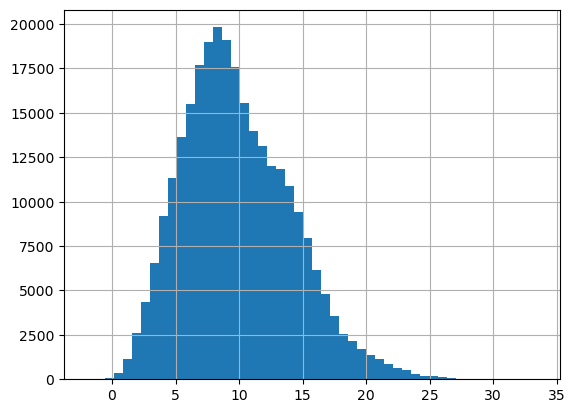

In [61]:
pm25_pred = est.predict(X)
pm25_pred.hist(bins=50)

## Linear Model: Using Avg Wind Alignment Angle

In [ ]:
df_modeling_lr.columns

Index(['avg_wind_alignment', 'population_10_14_male', 'month_07',
       'school_region_name_northern_san_joaquin_valley', 'pm25_log',
       'school_wspd', 'school_region_name_orange_county', 'pm25',
       'pm25_slope24', 'school_region_name_central_coast',
       'population_15_19_male', 'ps_wspd_merge', 'population_5_9_female',
       'pm25_slope12', 'school_region_name_san_diego_-_imperial',
       'avg_wind_alignment_cosine', 'school_region_name',
       'population_10_14_female', 'population_0_4_female',
       'school_temperature', 'pm25_lag_12mo', 'school_elevation_m', 'month_02',
       'population_0_4_male', 'month_08', 'total_pop_under19', 'school_count',
       'total_population_male', 'month_01', 'avg_wind_alignment_cosine_pow4',
       'pm25_last_month', 'avg_wind_alignment_cosine_div2',
       'nearby_point_source_count', 'month_11',
       'school_region_name_superior_california', 'total_population_female',
       'pm25_r6', 'pm25_r24', 'year', 'pm25_r9', 'point_source

In [ ]:
instrument

['avg_wind_alignment',
 'avg_wind_alignment_cosine',
 'avg_wind_alignment_cosine_pow2',
 'avg_wind_alignment_cosine_pow4',
 'avg_wind_alignment_cosine_div2',
 'avg_wind_alignment_cosine_div2_pow2',
 'avg_wind_alignment_cosine_div2_pow4']

In [62]:
x_all

['school_wspd',
 'ps_wspd_merge',
 'school_elevation_m',
 'ps_elevation_m',
 'population_0_4_male',
 'population_0_4_female',
 'population_5_9_male',
 'population_5_9_female',
 'population_10_14_male',
 'population_10_14_female',
 'population_15_19_male',
 'population_15_19_female',
 'total_population_male',
 'total_population_female',
 'ca_agi_per_returns',
 'school_temperature',
 'ps_temperature',
 'pm25_last_month',
 'pm25_r6',
 'pm25_r9',
 'pm25_r12',
 'pm25_r24',
 'pm25_slope6',
 'pm25_slope9',
 'pm25_slope12',
 'pm25_slope24',
 'pm25_lag_12mo',
 'nearby_point_source_count',
 'school_count',
 'point_source_pm25_tpy',
 'year',
 'month_02',
 'month_03',
 'month_04',
 'month_05',
 'month_06',
 'month_07',
 'month_08',
 'month_09',
 'month_10',
 'month_11',
 'month_12',
 'school_region_name_central_coast',
 'school_region_name_inland_empire',
 'school_region_name_north_coast',
 'school_region_name_northern_san_joaquin_valley',
 'school_region_name_orange_county',
 'school_region_name_

In [63]:
independent_var = ['avg_wind_alignment']

X = df_modeling_lr[independent_var + x_all]
y = df_modeling_lr['pm25']

In [ ]:
# add constant
X = sm.add_constant(X)

# fit
est = sm.OLS(y, X).fit()

# see summary
print(est.summary())

In [ ]:
# print RMSE
rmse_residuals = np.sqrt(est.mse_resid)
print(rmse_residuals)

3.7745054786286483


<AxesSubplot: >

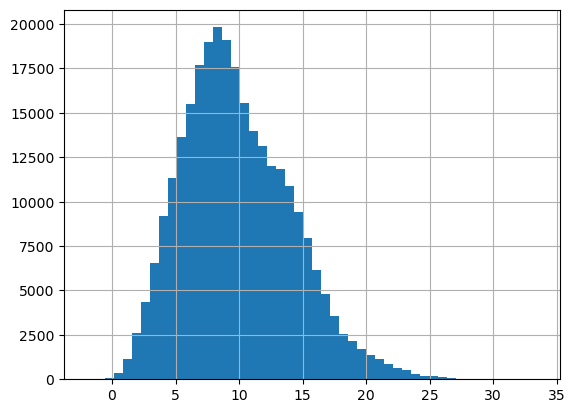

In [ ]:
pm25_pred = est.predict(X)
pm25_pred.hist(bins=50)